In [1]:
import numpy
import matplotlib.pyplot as plt
import torch
import cv2
import os
import numpy as np
from torchvision.datasets import Cityscapes
import sys
from PIL import Image              
from IPython.display import display 
import torchvision.transforms
import torchvision.transforms.functional as TF
import random 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#from baseline import train_trans, test_trans
def test_trans(image, mask=None):
    # Resize, 1 for Image.LANCZOS
    image = TF.resize(image, (512,1024), interpolation=1) 
    # From PIL to Tensor
    image = TF.to_tensor(image)
    # Normalize
    #image = TF.normalize(image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
    if mask:
        # Resize, 0 for Image.NEAREST
        mask = TF.resize(mask, (512,1024), interpolation=0) 
        mask = np.array(mask, np.uint8) # PIL Image to numpy array
        mask = torch.from_numpy(mask) # Numpy array to tensor
        return image, mask
    else:
        return image
    
def vislbl(label, mask_colors):
    #label = label.cpu()
    # Convert label data to visual representation
    #label = np.array(label.numpy())
    if label.shape[-1] == 1:
        label = label[:,:,0]
    
    # Convert train_ids to colors
    label = mask_colors[label]
    return label

In [3]:
from helpers.minicity import MiniCity
#trainset = MiniCity('./', split='train', transforms=train_trans)
trainset = MiniCity('./', split='train', transforms=test_trans)
valset = MiniCity('./', split='val', transforms=test_trans)

ModuleNotFoundError: No module named 'helpers.minicity'

### Training Set

[186834  11900 169962      0      0   4032    550    470   7811    237
  41214    770   1323  63029      0      0    732      0  35424] 524288


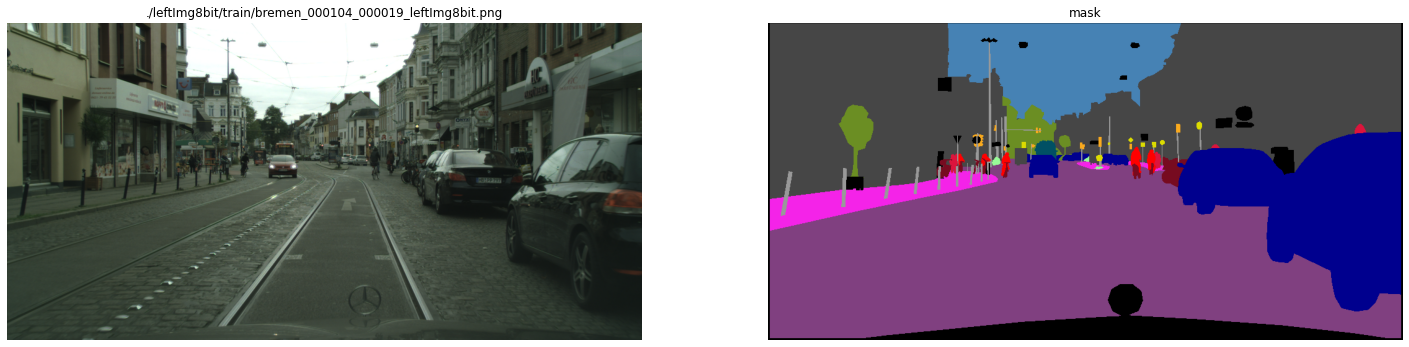

In [28]:
i = 150 #random.randint(0, len(trainset))
img, mask, filename = trainset[i]
mask_vis = vislbl(mask, MiniCity.mask_colors)
img_vis = torchvision.transforms.ToPILImage()(img)

# display images
fig, ax = plt.subplots(1,2, figsize=(25,50))
ax[0].axis("off")
ax[0].set_title(filename)

ax[1].axis("off")
ax[1].set_title('mask')

ax[0].imshow(img_vis)
ax[1].imshow(mask_vis)

mask_hist, _ = np.histogram(mask.ravel(), 19, [0, 19])
print(mask_hist, mask_hist.sum())

In [13]:
class_pixel_distribution_train = [0 * 19]
for i in range(len(trainset)):
    img, mask, filename = trainset[i]
    img_vis = torchvision.transforms.ToPILImage()(img)
    """
    # display images
    fig, ax = plt.subplots(1,2, figsize=(25,50))
    ax[0].axis("off")
    ax[0].set_title(filename)

    ax[1].axis("off")
    ax[1].set_title('mask')

    ax[0].imshow(img_vis)
    ax[1].imshow(mask)
    """
    mask_hist, _ = np.histogram(mask.ravel(), 19, [0, 19])
    
    if mask_hist[16] != 0:
        print("filename : ", filename, ", idx : ", i, ", num_pixels : ", mask_hist[16])
    
    class_pixel_distribution_train += mask_hist
print(class_pixel_distribution_train)

filename :  ./leftImg8bit/train/zurich_000037_000019_leftImg8bit.png , idx :  3 , num_pixels :  489
filename :  ./leftImg8bit/train/zurich_000010_000019_leftImg8bit.png , idx :  20 , num_pixels :  1736
filename :  ./leftImg8bit/train/darmstadt_000047_000019_leftImg8bit.png , idx :  76 , num_pixels :  55542
filename :  ./leftImg8bit/train/bochum_000000_001519_leftImg8bit.png , idx :  104 , num_pixels :  43
filename :  ./leftImg8bit/train/strasbourg_000001_016376_leftImg8bit.png , idx :  129 , num_pixels :  637
filename :  ./leftImg8bit/train/bremen_000104_000019_leftImg8bit.png , idx :  150 , num_pixels :  732
[34822061  5683261 21031469   472032   660633  1265940   194793   501776
 14912059   957450  3710020  1233543   125398  6327546   239151    69171
    59179    96316 12495802]


### Validation Set

[227968   8838  43765      0      0   9719    465  20672 114063  26077
  11421    404      0  19039      0      0   1137      0  40720] 524288


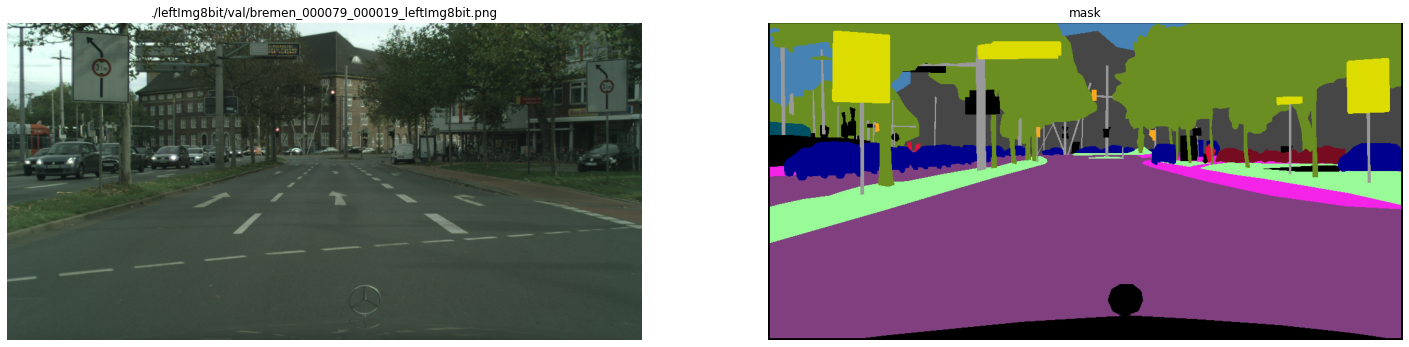

In [32]:
i = 31 #random.randint(0, len(trainset))
img, mask, filename = valset[i]
mask_vis = vislbl(mask, MiniCity.mask_colors)
img_vis = torchvision.transforms.ToPILImage()(img)

# display images
fig, ax = plt.subplots(1,2, figsize=(25,50))
ax[0].axis("off")
ax[0].set_title(filename)

ax[1].axis("off")
ax[1].set_title('mask')

ax[0].imshow(img_vis)
ax[1].imshow(mask_vis)

mask_hist, _ = np.histogram(mask.ravel(), 19, [0, 19])
print(mask_hist, mask_hist.sum())

In [19]:
class_pixel_distribution_val = [0 * 19]
for i in range(len(valset)):
    img, mask, filename = valset[i]
    img_vis = torchvision.transforms.ToPILImage()(img)
    """
    # display images
    fig, ax = plt.subplots(1,2, figsize=(25,50))
    ax[0].axis("off")
    ax[0].set_title(filename)

    ax[1].axis("off")
    ax[1].set_title('mask')

    ax[0].imshow(img_vis)
    ax[1].imshow(mask)
    """
    mask_hist, _ = np.histogram(mask.ravel(), 19, [0, 19])
    
    if mask_hist[16] != 0:
        print("filename : ", filename, ", idx : ", i, ", num_pixels : ", mask_hist[16])
    
    class_pixel_distribution_val += mask_hist
print(class_pixel_distribution_val)

filename :  ./leftImg8bit/val/dusseldorf_000136_000019_leftImg8bit.png , idx :  2 , num_pixels :  53766
filename :  ./leftImg8bit/val/hamburg_000000_062371_leftImg8bit.png , idx :  19 , num_pixels :  2333
filename :  ./leftImg8bit/val/dusseldorf_000140_000019_leftImg8bit.png , idx :  23 , num_pixels :  2905
filename :  ./leftImg8bit/val/bremen_000079_000019_leftImg8bit.png , idx :  31 , num_pixels :  1137
filename :  ./leftImg8bit/val/bremen_000158_000019_leftImg8bit.png , idx :  36 , num_pixels :  1283
filename :  ./leftImg8bit/val/bremen_000141_000019_leftImg8bit.png , idx :  87 , num_pixels :  8
[16772049  2906498  9936391   483569   587120   694860   139773   286009
  7237022   651638  2109572   378527    41138  3166616   231280    69630
    61432    27400  6648276]


### Training Set Class Distribution

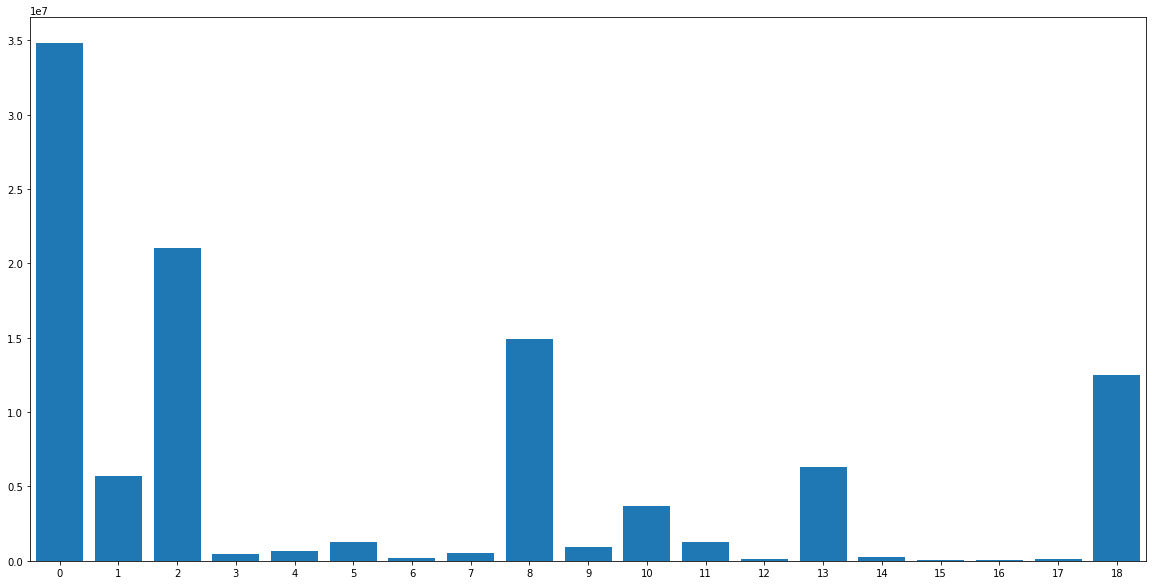

In [104]:
import matplotlib.ticker as mticker

plt.figure(figsize=(20,10))
plt.bar(list(np.arange(len(class_pixel_distribution_train))), class_pixel_distribution_train)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlim([-0.5, 18.5])
plt.show()

### Validation Set Class Distribution

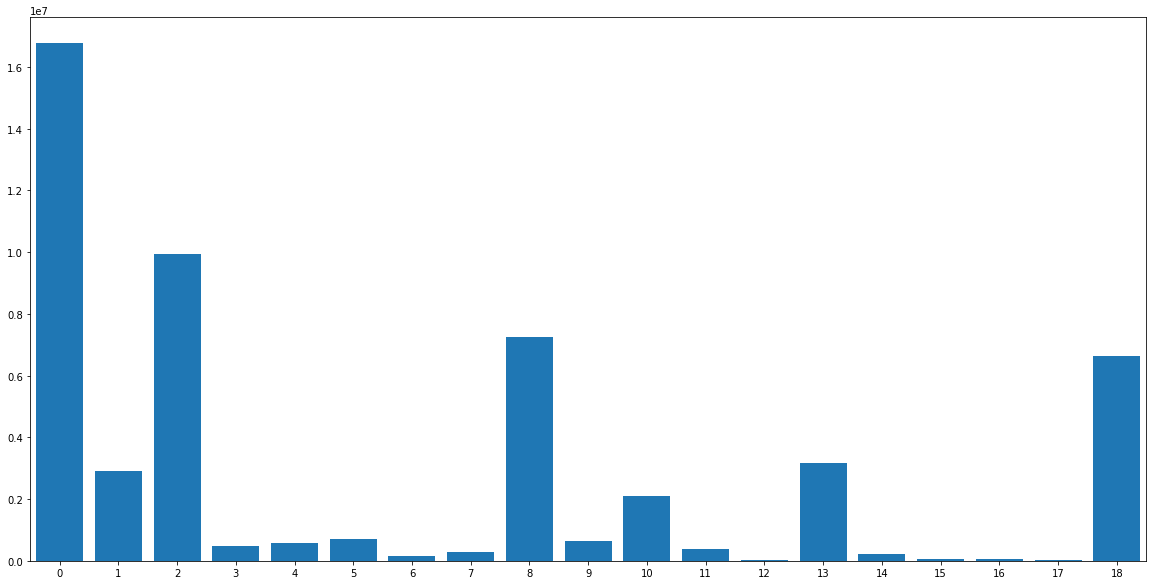

In [20]:
import matplotlib.ticker as mticker

plt.figure(figsize=(20,10))
plt.bar(list(np.arange(len(class_pixel_distribution_val))), class_pixel_distribution_val)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlim([-0.5, 18.5])
plt.show()

### etc..

In [105]:
a = list(np.arange(len(class_pixel_distribution)))

In [106]:
a = a[:-1]

In [107]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [109]:
class_weight = [34822061, 5683261, 21031469, 472032, 660633, 1265940, 194793, 501776, 14912059, 957450, 3710020, 1233543, 125398, 6327546, 239151, 69171, 59179, 96316, 12495802]

In [113]:
max(class_weight)

34822061

In [117]:
class_weight = [max(class_weight)/x for x in class_weight]

In [118]:
class_weight

[1.0,
 6.1271268379192865,
 1.6557122567139748,
 73.77055157277474,
 52.7101446642841,
 27.50688105281451,
 178.76443712043042,
 69.39762164790663,
 2.3351611605077474,
 36.369586923599144,
 9.385949671430343,
 28.229304531743114,
 277.69231566691656,
 5.5032489688735575,
 145.60700561569885,
 503.41994477454426,
 588.4192196556211,
 361.5397337929316,
 2.786700765585114]